In [1]:
import pandas as pd
import os
import sys
from sklearn import datasets
import statsmodels.api as sm
from stargazer.stargazer import Stargazer
from IPython.display import display, HTML
import matplotlib.pyplot as plt

In [2]:
# Importing Configs
# Define the path where config.py is located
os.chdir("/Users/kylenabors/Documents/GitHub/Finance-ML-Modeling")
config_file_path = os.getcwd()
print(config_file_path)

# Add this path to the sys.path
sys.path.append(config_file_path)

import config

finbert_models = config.finbert_models

/Users/kylenabors/Documents/GitHub/Finance-ML-Modeling
/Users/kylenabors/Documents/GitHub/Finance-ML-Modeling
/Users/kylenabors/Documents
/Users/kylenabors/Documents/GitHub/Finance-ML-Modeling


In [3]:
us_speech = pd.read_csv(
    f"{finbert_models}/Fed/Speeches/Fed_Speeches_finbert_model_short.csv"
)
us_speech["date"] = pd.to_datetime(us_speech["date"])
us_speech = us_speech[["date", "sentiment"]]
us_speech = us_speech.rename(columns={"sentiment": "speech_sentiment"})
us_speech = us_speech.groupby("date").mean().reset_index()
us_minutes = pd.read_csv(
    f"{finbert_models}/Fed/Minutes/Fed_Minutes_finbert_model_short.csv"
)
us_minutes["date"] = pd.to_datetime(us_minutes["date"])
us_minutes = us_minutes[["date", "sentiment"]]
us_minutes = us_minutes.rename(columns={"sentiment": "minutes_sentiment"})
us_minutes = us_minutes.groupby("date").mean().reset_index()
us_statements = pd.read_csv(
    f"{finbert_models}/Fed/Statements/Fed_Statements_finbert_model_short.csv"
)
us_statements["date"] = pd.to_datetime(us_statements["date"])
us_statements = us_statements[["date", "sentiment"]]
us_statements = us_statements.rename(columns={"sentiment": "statements_sentiment"})
us_statements = us_statements.groupby("date").mean().reset_index()
us_beigebooks = pd.read_csv(
    f"{finbert_models}/Fed/Beige Book/Fed_Beige Book_finbert_model_short.csv"
)
us_beigebooks["date"] = pd.to_datetime(us_beigebooks["date"])
us_beigebooks = us_beigebooks[["date", "sentiment"]]
us_beigebooks = us_beigebooks.rename(columns={"sentiment": "beigebooks_sentiment"})
us_beigebooks = us_beigebooks.groupby("date").mean().reset_index()

sentiment_us = us_speech.copy(deep=True)
sentiment_us = pd.merge(sentiment_us, us_minutes, how="outer", on="date")
sentiment_us = pd.merge(sentiment_us, us_statements, how="outer", on="date")
sentiment_us = pd.merge(sentiment_us, us_beigebooks, how="outer", on="date")

In [4]:
eu_speech = pd.read_csv(
    f"{finbert_models}/ECB/Speeches/ECB_Speeches_finbert_model_short.csv"
)
eu_speech["date"] = pd.to_datetime(eu_speech["date"])
eu_speech = eu_speech[["date", "sentiment"]]
eu_speech = eu_speech.rename(columns={"sentiment": "speech_sentiment"})
eu_speech = eu_speech.groupby("date").mean().reset_index()

eu_mpd = pd.read_csv(
    f"{finbert_models}/ECB/Monetary Policy Decisions/ECB_Monetary Policy Decisions_finbert_model_short.csv"
)
eu_mpd["date"] = pd.to_datetime(eu_mpd["date"])
eu_mpd = eu_mpd[["date", "sentiment"]]
eu_mpd = eu_mpd.rename(columns={"sentiment": "mpd_sentiment"})
eu_mpd = eu_mpd.groupby("date").mean().reset_index()

eu_pressconf = pd.read_csv(
    f"{finbert_models}/ECB/Press Conferences/ECB_Press Conferences_finbert_model_short.csv"
)
eu_pressconf["date"] = pd.to_datetime(eu_pressconf["date"])
eu_pressconf = eu_pressconf[["date", "sentiment"]]
eu_pressconf = eu_pressconf.rename(columns={"sentiment": "pressconf_sentiment"})
eu_pressconf = eu_pressconf.groupby("date").mean().reset_index()

eu_eb = pd.read_csv(
    f"{finbert_models}/ECB/Economic Bulletin/ECB_Economic Bulletin_finbert_model_short.csv"
)
eu_eb["date"] = pd.to_datetime(eu_eb["date"])
eu_eb = eu_eb[["date", "sentiment"]]
eu_eb = eu_eb.rename(columns={"sentiment": "eb_sentiment"})
eu_eb = eu_eb.groupby("date").mean().reset_index()

sentiment_eu = eu_speech.copy(deep=True)
sentiment_eu = pd.merge(sentiment_eu, eu_mpd, how="outer", on="date")
sentiment_eu = pd.merge(sentiment_eu, eu_pressconf, how="outer", on="date")
sentiment_eu = pd.merge(sentiment_eu, eu_eb, how="outer", on="date")

In [5]:
sentiment_us = sentiment_us[
    (sentiment_us["date"] >= "2000-01-01") & (sentiment_us["date"] <= "2023-06-30")
]
sentiment_eu = sentiment_eu[
    (sentiment_eu["date"] >= "2000-01-01") & (sentiment_eu["date"] <= "2023-06-30")
]

In [6]:
# Print summary statistics
print(sentiment_us.describe())

                                date  speech_sentiment  minutes_sentiment  \
count                           1668       1225.000000         188.000000   
mean   2011-07-04 06:10:21.582733824         -0.030230          -0.138023   
min              2000-01-07 00:00:00         -1.000000          -0.415842   
25%              2005-08-29 06:00:00         -0.110465          -0.207097   
50%              2011-01-19 00:00:00         -0.037267          -0.128329   
75%              2017-07-11 06:00:00          0.045455          -0.060514   
max              2023-05-31 00:00:00          0.531250           0.159763   
std                              NaN          0.139335           0.107024   

       statements_sentiment  beigebooks_sentiment  
count            199.000000            140.000000  
mean              -0.036533             -0.036793  
min               -0.833333             -0.463235  
25%               -0.125000             -0.103809  
50%                0.000000             -0.003

In [7]:
print(sentiment_eu.describe())

                                date  speech_sentiment  mpd_sentiment  \
count                           2079       1788.000000      68.000000   
mean   2012-04-28 17:18:16.103896064         -0.007216      -0.122385   
min              2000-01-05 00:00:00         -0.500000      -0.356223   
25%              2007-04-18 12:00:00         -0.080053      -0.209474   
50%              2012-09-11 00:00:00         -0.011800      -0.121655   
75%              2017-09-13 12:00:00          0.058824      -0.052460   
max              2023-06-01 00:00:00          0.428571       0.109524   
std                              NaN          0.109156       0.116030   

       pressconf_sentiment  eb_sentiment  
count           241.000000     67.000000  
mean              0.072272     -0.025591  
min              -0.318182     -0.100418  
25%              -0.038961     -0.053254  
50%               0.058824     -0.025167  
75%               0.166667     -0.001844  
max               0.450980      0.090909 

In [8]:
sentiment_us = sentiment_us.resample("Q", on="date").mean().reset_index()
sentiment_eu = sentiment_eu.resample("Q", on="date").mean().reset_index()

In [9]:
sentiment_eu["date"] = pd.to_datetime(sentiment_eu["date"], unit="D")

In [10]:
filter_items = [
    "speech_sentiment",
    "minutes_sentiment",
    "statements_sentiment",
    "beigebooks_sentiment",
]

for item in filter_items:
    filter_df = sentiment_us.copy(deep=True)
    filter_df = filter_df[["date", f"{item}"]]

    cycle, trend = sm.tsa.filters.hpfilter(filter_df[f"{item}"], 1600)
    # cycle, trend = sm.tsa.filters.hpfilter(filter_df[f'{item}'], (100*(12**2)))

    item_decomp = filter_df[[f"{item}"]]
    item_decomp[f"{item}_cycle"] = cycle
    item_decomp[f"{item}_trend"] = trend

    filter_df = pd.merge(filter_df, item_decomp, on=f"{item}", how="left")
    filter_df = filter_df[["date", f"{item}_cycle"]]
    sentiment_us = sentiment_us.drop(columns=[f"{item}"])
    filter_df = filter_df.rename(columns={f"{item}_cycle": f"{item}"})
    sentiment_us = pd.merge(sentiment_us, filter_df, on="date", how="left")
    sentiment_us = sentiment_us.groupby("date").mean().reset_index()

In [11]:
filter_items = [
    "speech_sentiment",
    "mpd_sentiment",
    "pressconf_sentiment",
    "eb_sentiment",
]

for item in filter_items:
    filter_df = sentiment_eu.copy(deep=True)
    filter_df = filter_df[["date", f"{item}"]]

    cycle, trend = sm.tsa.filters.hpfilter(filter_df[f"{item}"], 1600)
    # cycle, trend = sm.tsa.filters.hpfilter(filter_df[f'{item}'], (100*(12**2)))

    item_decomp = filter_df[[f"{item}"]]
    item_decomp[f"{item}_cycle"] = cycle
    item_decomp[f"{item}_trend"] = trend

    filter_df = pd.merge(filter_df, item_decomp, on=f"{item}", how="left")
    filter_df = filter_df[["date", f"{item}_cycle"]]
    sentiment_eu = sentiment_eu.drop(columns=[f"{item}"])
    filter_df = filter_df.rename(columns={f"{item}_cycle": f"{item}"})
    sentiment_eu = pd.merge(sentiment_eu, filter_df, on="date", how="left")
    sentiment_eu = sentiment_eu.groupby("date").mean().reset_index()

In [12]:
sent_us = pd.read_csv(
    f"{finbert_models}/Fed/Minutes/Fed_Minutes_finbert_model_short.csv"
)
sent_us["date"] = pd.to_datetime(sent_us["date"])
sent_eu = pd.read_csv(
    f"{finbert_models}/ECB/Monetary policy decisions/ECB_Monetary policy decisions_finbert_model_short.csv"
)
sent_eu["date"] = pd.to_datetime(sent_eu["date"])

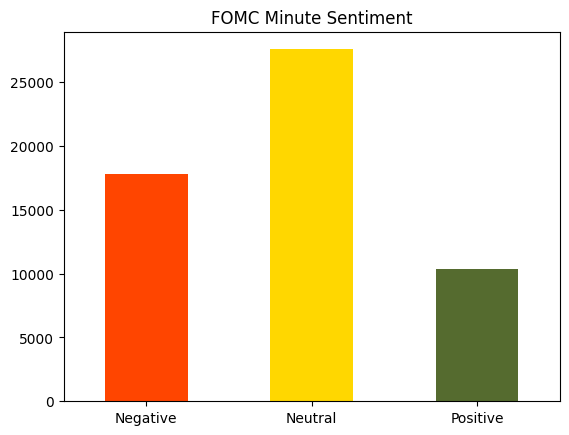

In [13]:
fig, ax = plt.subplots()
sent_us["sentiment"].value_counts().sort_index().plot(
    ax=ax, kind="bar", color=["orangered", "Gold", "darkolivegreen"]
)
ax.set_title("FOMC Minute Sentiment")
ax.set_xticklabels(["Negative", "Neutral", "Positive"], rotation=0)
ax.set_xlabel("")  # Remove the x label
plt.show()

In [14]:
# sent_us2 = sent_us.copy(deep=True)
# sent_eu2 = sent_eu.copy(deep=True)

# sent_us2 = sent_us2[["date", "positive", "negative", "neutral"]]
# sent_eu2 = sent_eu2[["date", "positive", "negative", "neutral"]]

# sent_us2 = sent_us2.groupby("date").sum().reset_index()
# sent_eu2 = sent_eu2.groupby("date").sum().reset_index()

# sent_us2 = sent_us2.resample("Q", on="date").sum().reset_index()
# sent_eu2 = sent_eu2.resample("Q", on="date").sum().reset_index()

# sent_us2["total"] = sent_us2["positive"] + sent_us2["negative"] + sent_us2["neutral"]
# sent_eu2["total"] = sent_eu2["positive"] + sent_eu2["negative"] + sent_eu2["neutral"]

# sent_us2["positive"] = sent_us2["positive"] / sent_us2["total"]
# sent_us2["negative"] = sent_us2["negative"] / sent_us2["total"]
# sent_us2["neutral"] = sent_us2["neutral"] / sent_us2["total"]

# sent_eu2["positive"] = sent_eu2["positive"] / sent_eu2["total"]
# sent_eu2["negative"] = sent_eu2["negative"] / sent_eu2["total"]
# sent_eu2["neutral"] = sent_eu2["neutral"] / sent_eu2["total"]

In [15]:
sent_us = sent_us[["date", "sentiment"]]
sent_eu = sent_eu[["date", "sentiment"]]

sent_us = sent_us.groupby("date").mean().reset_index()
sent_eu = sent_eu.groupby("date").mean().reset_index()

sent_us = sent_us[sent_us["date"] > "2000-01-01"]
sent_eu = sent_eu[sent_eu["date"] > "2000-01-01"]

sent_us = sent_us.resample("Q", on="date").mean().reset_index()
sent_eu = sent_eu.resample("Q", on="date").mean().reset_index()

Text(0.5, 1.0, 'US Federal Reserve FOMC Minutes Sentiment Quarterly with HP Filter')

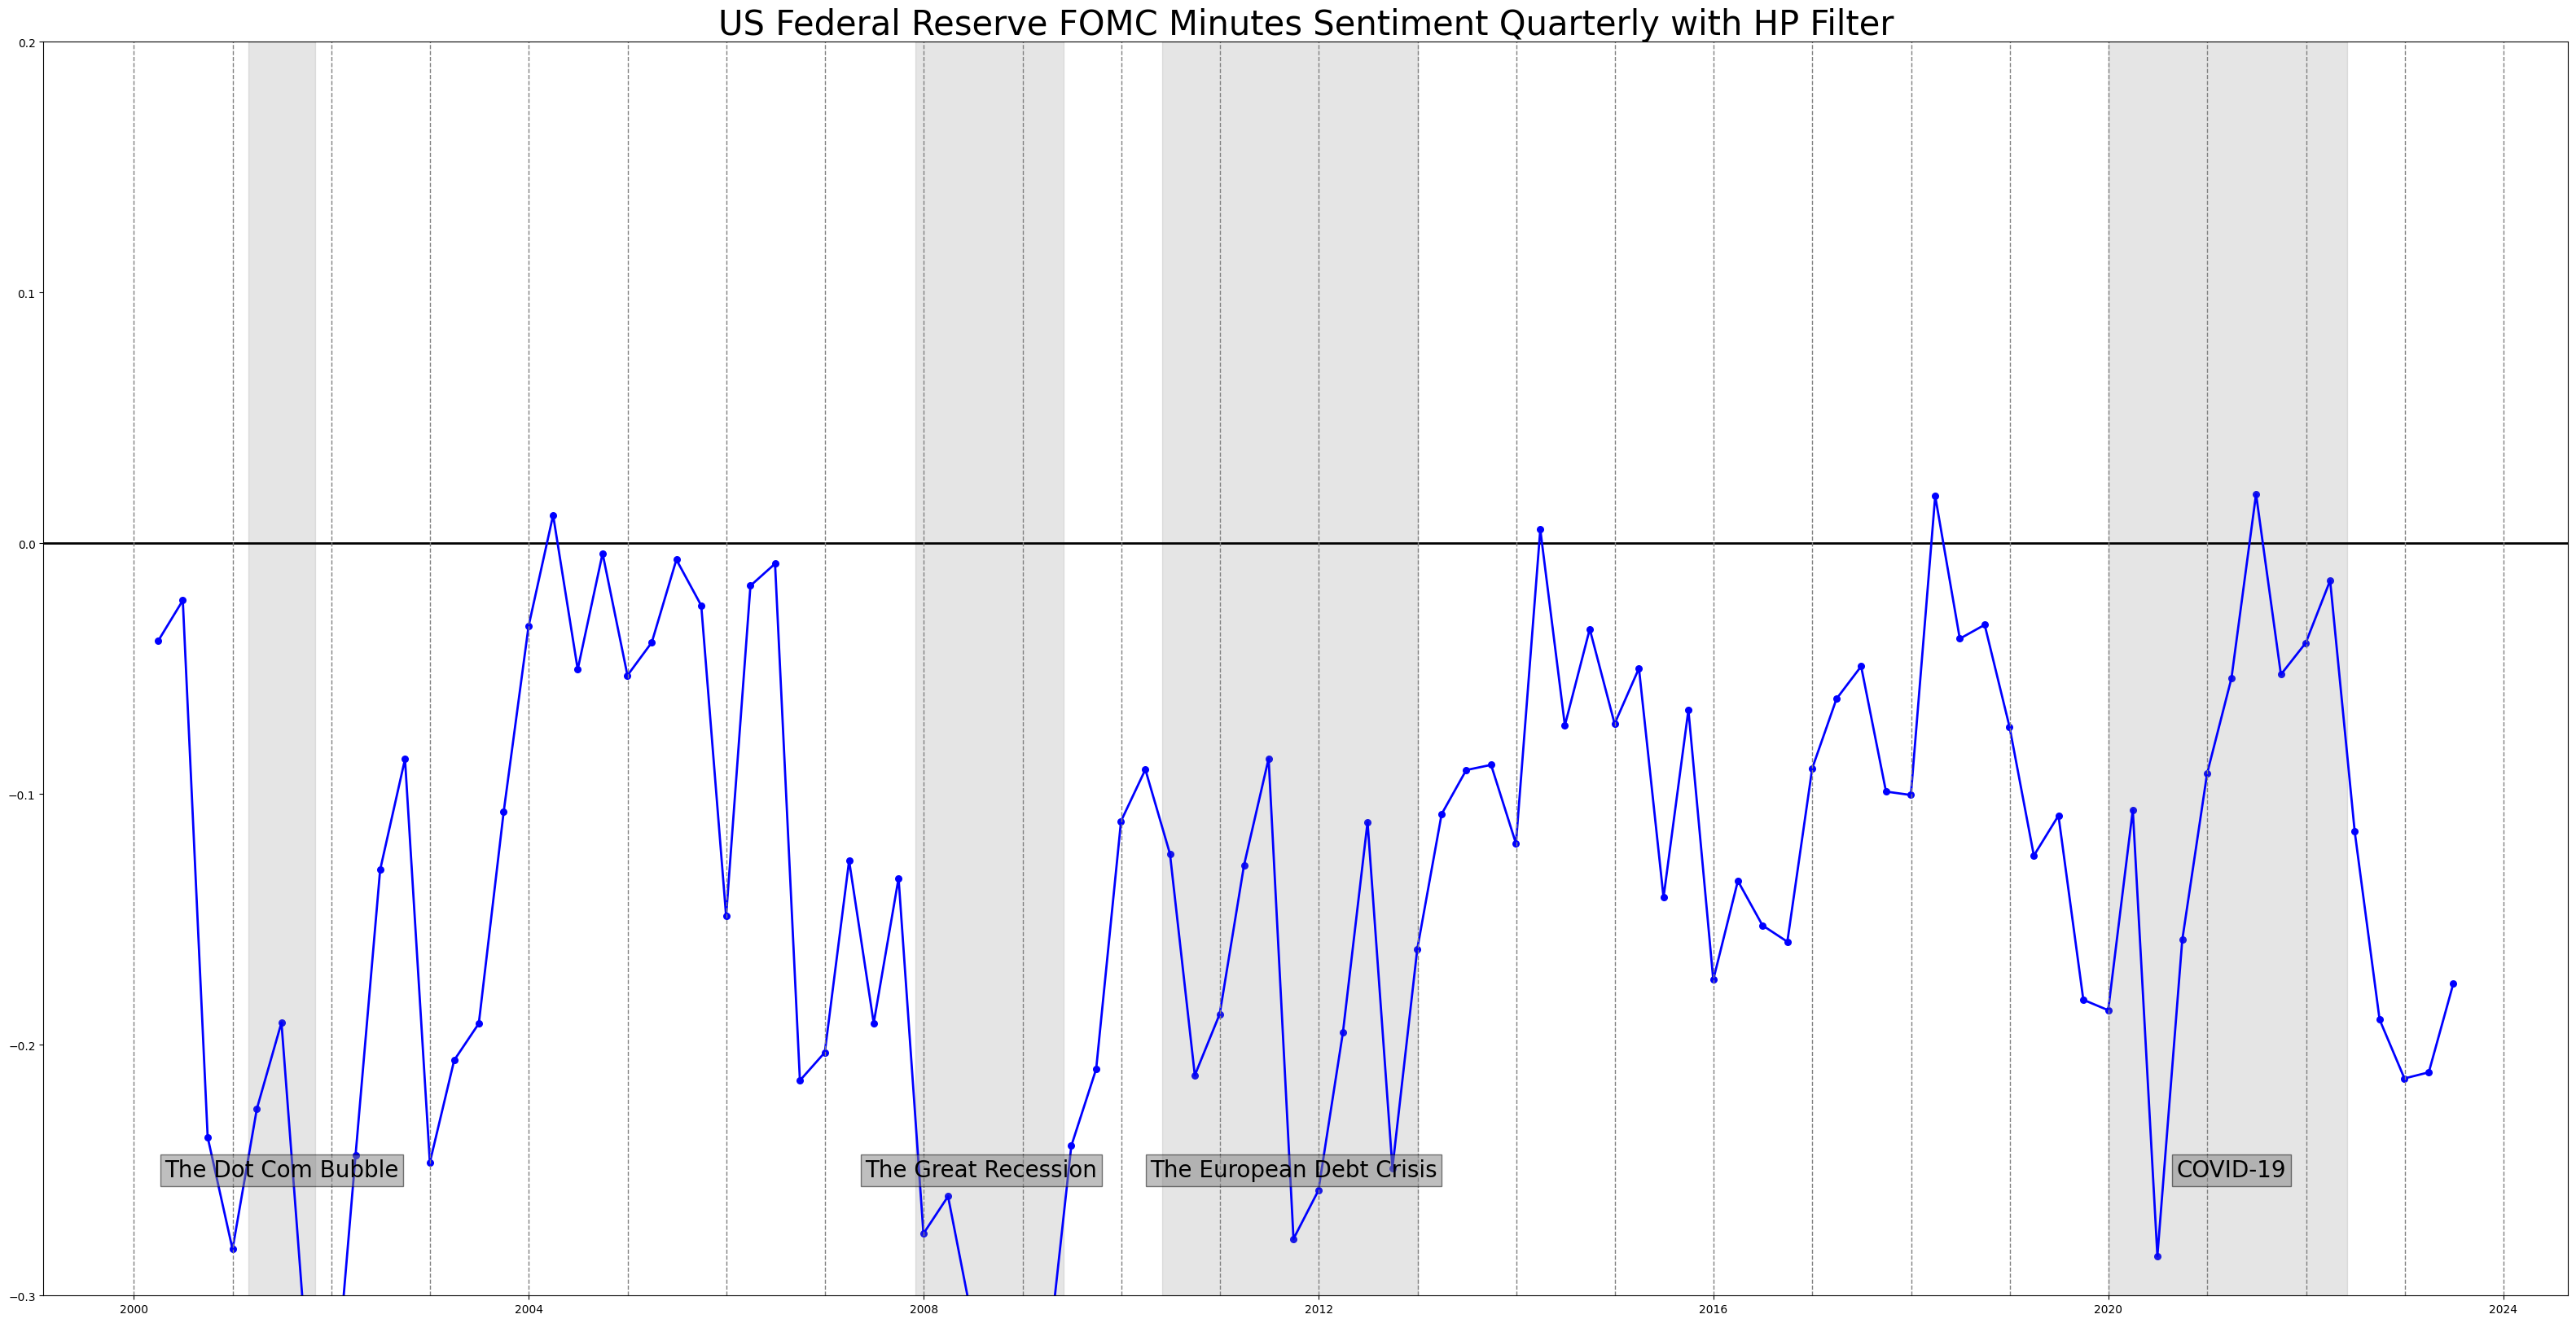

In [16]:
x1 = "sentiment"

fig, ax = plt.subplots(figsize=(40, 20))

# Create a black line at 0
ax.axhline(0, color="black", lw=2)

ax.scatter(sent_us["date"], sent_us[f"{x1}"], label=f"{x1}", color="blue", s=30)
ax.plot(sent_us["date"], sent_us[f"{x1}"], label=f"{x1}", color="blue", lw=2)

lh = -0.25

# Great Recession
ax.axvspan(
    pd.to_datetime("2007-12-01"), pd.to_datetime("2009-06-01"), color="gray", alpha=0.2
)
ax.text(
    pd.to_datetime("2008-08-01"),
    lh,
    "The Great Recession",
    horizontalalignment="center",
    verticalalignment="center",
    fontsize=20,
    bbox=dict(facecolor="gray", alpha=0.5),
)

# COVID
ax.axvspan(
    pd.to_datetime("2020-01-01"), pd.to_datetime("2022-06-01"), color="gray", alpha=0.2
)
ax.text(
    pd.to_datetime("2021-04-01"),
    lh,
    "COVID-19",
    horizontalalignment="center",
    verticalalignment="center",
    fontsize=20,
    bbox=dict(facecolor="gray", alpha=0.5),
)

# European Debt Crisis
ax.axvspan(
    pd.to_datetime("2010-06-01"), pd.to_datetime("2013-01-01"), color="gray", alpha=0.2
)
ax.text(
    pd.to_datetime("2011-10-01"),
    lh,
    "The European Debt Crisis",
    horizontalalignment="center",
    verticalalignment="center",
    fontsize=20,
    bbox=dict(facecolor="gray", alpha=0.5),
)

# Dot Com Bubble
ax.axvspan(
    pd.to_datetime("2001-03-01"), pd.to_datetime("2001-11-01"), color="gray", alpha=0.2
)
ax.text(
    pd.to_datetime("2001-07-01"),
    lh,
    "The Dot Com Bubble",
    horizontalalignment="center",
    verticalalignment="center",
    fontsize=20,
    bbox=dict(facecolor="gray", alpha=0.5),
)

for year in range(2000, 2025):
    ax.axvline(pd.to_datetime(f"{year}-01-01"), color="gray", linestyle="--", lw=1)

ax.set_ylim(-0.3, 0.2)
ax.set_title(
    "US Federal Reserve FOMC Minutes Sentiment Quarterly with HP Filter", fontsize=30
)

Text(0.5, 1.0, 'ECB Monetary Policy Account Sentiment')

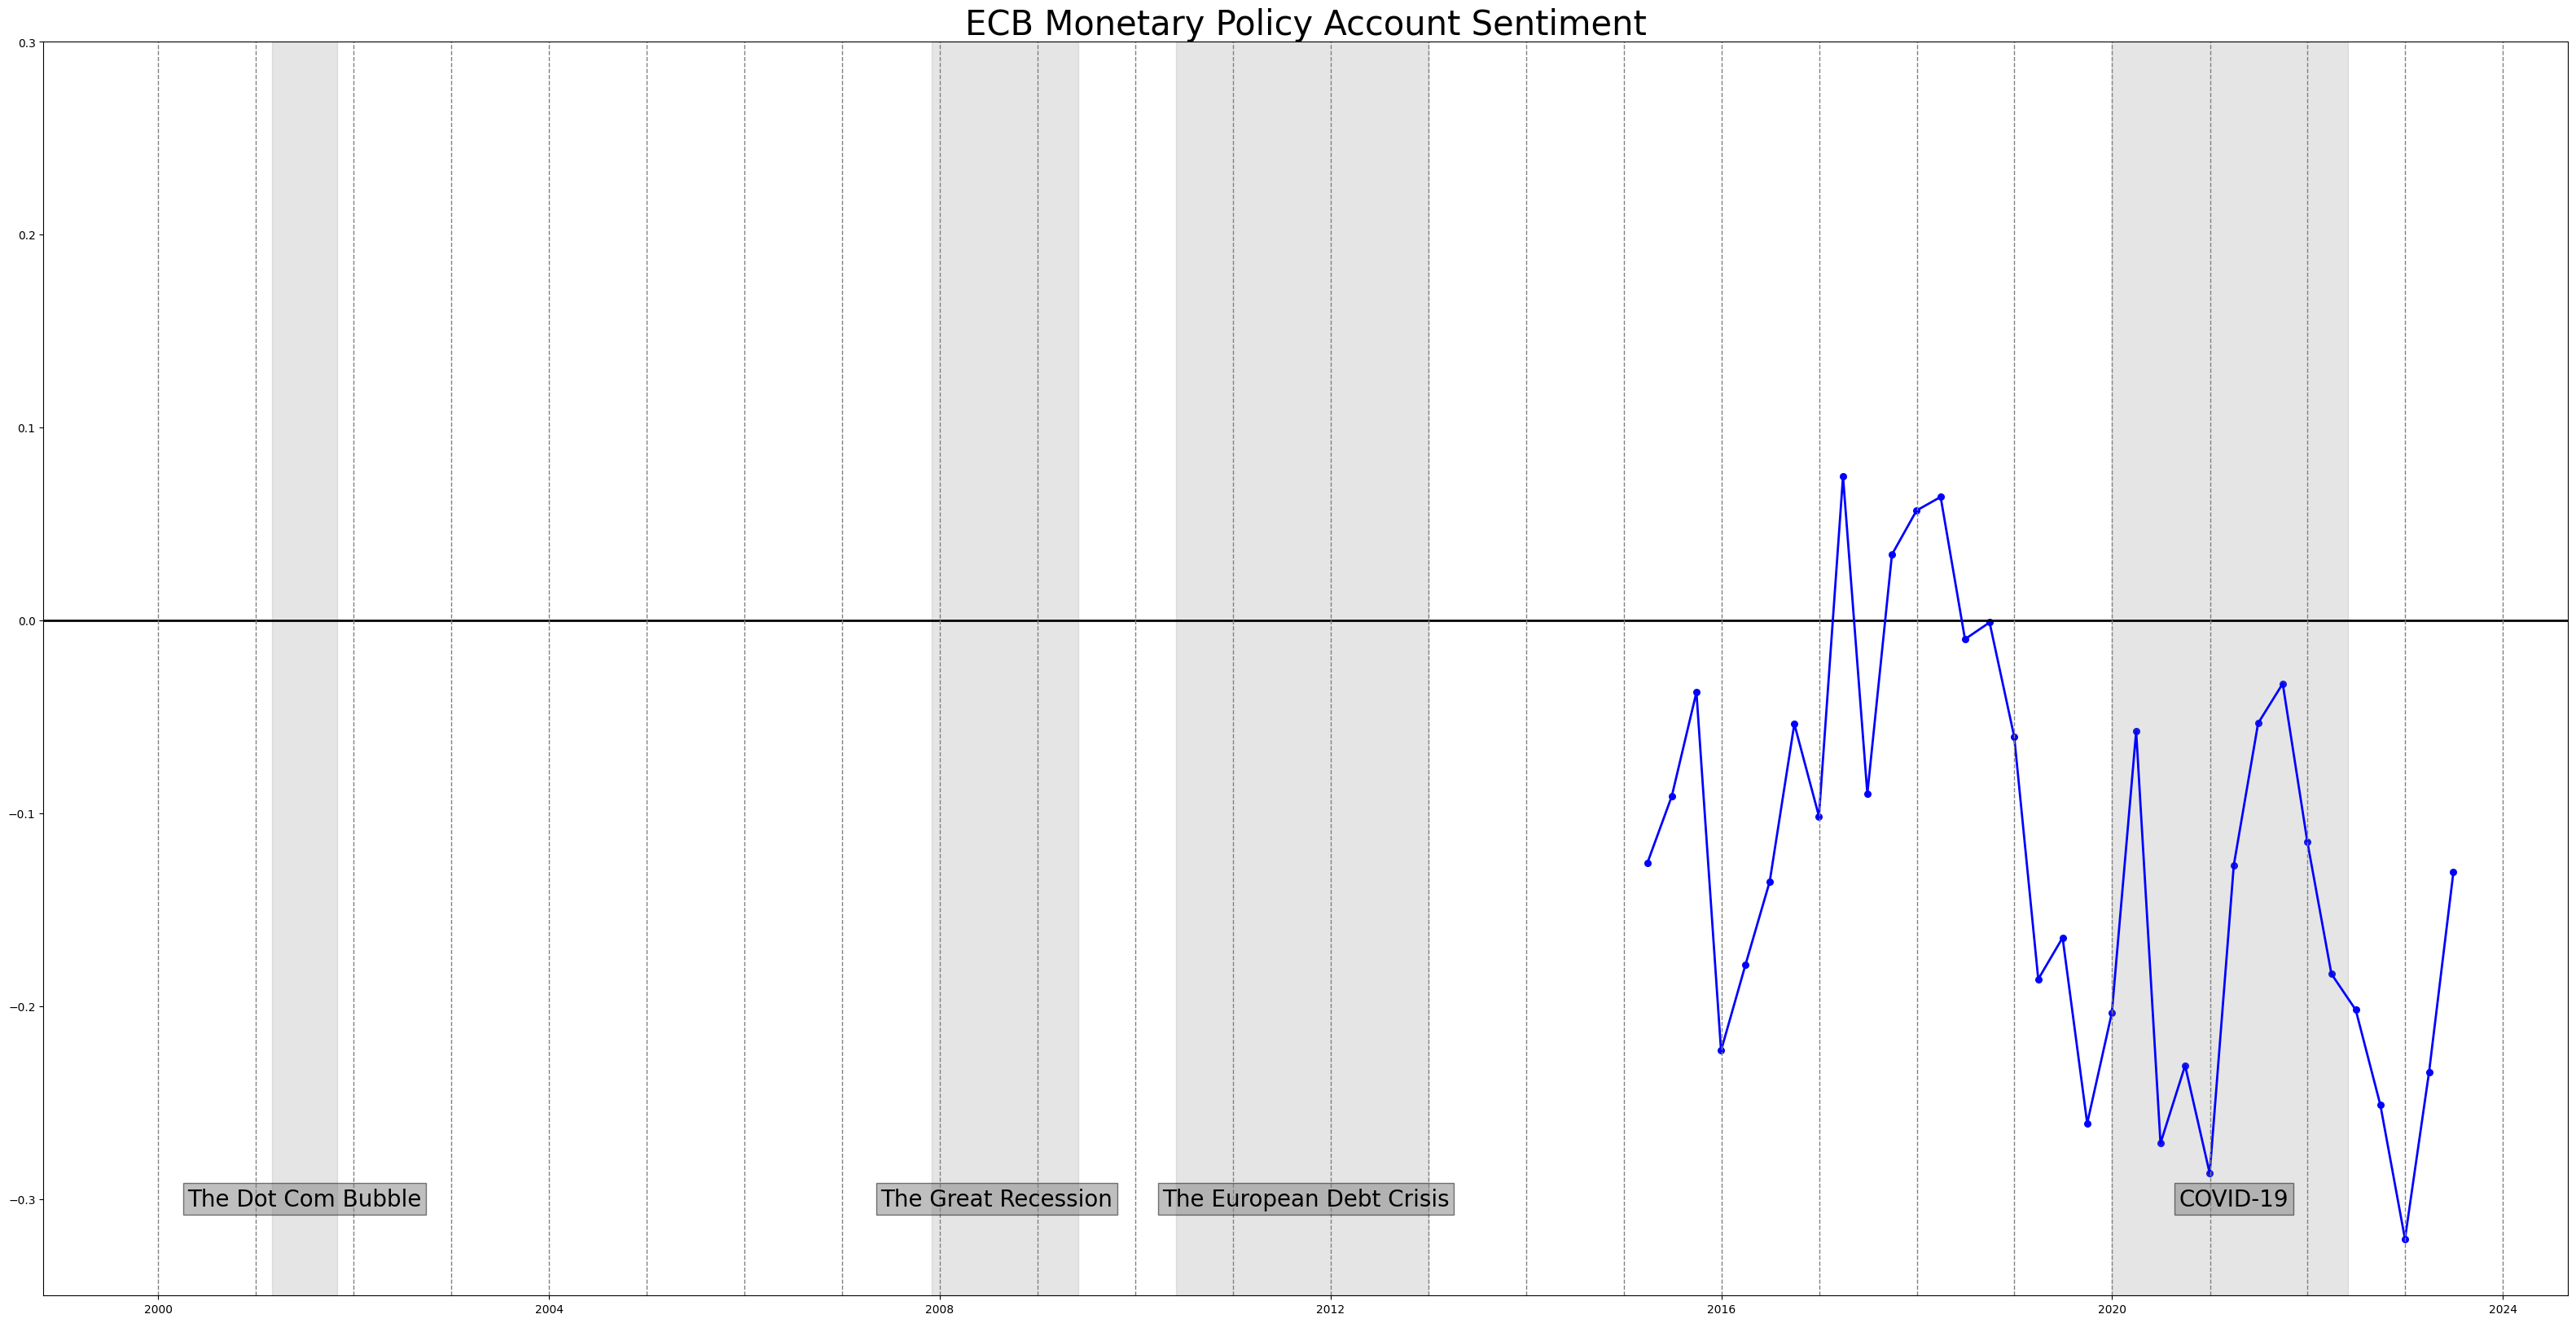

In [17]:
x1 = "sentiment"

fig, ax = plt.subplots(figsize=(40, 20))

# Create a black line at 0
ax.axhline(0, color="black", lw=2)

ax.scatter(sent_eu["date"], sent_eu[f"{x1}"], label=f"{x1}", color="blue", s=30)
ax.plot(sent_eu["date"], sent_eu[f"{x1}"], label=f"{x1}", color="blue", lw=2)

lh2 = -0.3
# Great Recession
ax.axvspan(
    pd.to_datetime("2007-12-01"), pd.to_datetime("2009-06-01"), color="gray", alpha=0.2
)
ax.text(
    pd.to_datetime("2008-08-01"),
    lh2,
    "The Great Recession",
    horizontalalignment="center",
    verticalalignment="center",
    fontsize=20,
    bbox=dict(facecolor="gray", alpha=0.5),
)

# COVID
ax.axvspan(
    pd.to_datetime("2020-01-01"), pd.to_datetime("2022-06-01"), color="gray", alpha=0.2
)
ax.text(
    pd.to_datetime("2021-04-01"),
    lh2,
    "COVID-19",
    horizontalalignment="center",
    verticalalignment="center",
    fontsize=20,
    bbox=dict(facecolor="gray", alpha=0.5),
)

# European Debt Crisis
ax.axvspan(
    pd.to_datetime("2010-06-01"), pd.to_datetime("2013-01-01"), color="gray", alpha=0.2
)
ax.text(
    pd.to_datetime("2011-10-01"),
    lh2,
    "The European Debt Crisis",
    horizontalalignment="center",
    verticalalignment="center",
    fontsize=20,
    bbox=dict(facecolor="gray", alpha=0.5),
)

# Dot Com Bubble
ax.axvspan(
    pd.to_datetime("2001-03-01"), pd.to_datetime("2001-11-01"), color="gray", alpha=0.2
)
ax.text(
    pd.to_datetime("2001-07-01"),
    lh2,
    "The Dot Com Bubble",
    horizontalalignment="center",
    verticalalignment="center",
    fontsize=20,
    bbox=dict(facecolor="gray", alpha=0.5),
)

for year in range(2000, 2025):
    ax.axvline(pd.to_datetime(f"{year}-01-01"), color="gray", linestyle="--", lw=1)

ax.set_ylim(-0.35, 0.3)
ax.set_title("ECB Monetary Policy Account Sentiment", fontsize=30)

In [18]:
# fig, ax = plt.subplots(figsize = (40, 20))

# #Create a black line at 0
# ax.axhline(0, color='black', lw=2)

# #create a mixed column graph of positive negative and neutral sentiment overtime
# # ax.bar(sent_us2['date'], sent_us2['positive'], label='positive', color='green', width=5)
# # ax.bar(sent_us2['date'], sent_us2['negative'], label='negative', color='red', width=5)
# # ax.bar(sent_us2['date'], sent_us2['neutral'], label='neutral', color='blue', width=5)

# ax.bar(sent_us2['date'], sent_us2['negative'], label='positive', color='red', width=30)
# ax.bar(sent_us2['date'], sent_us2['neutral'], label='negative', color='yellow', width=30, bottom=sent_us2['negative'])
# ax.bar(sent_us2['date'], sent_us2['positive'], label='neutral', color='green', width=30, bottom=sent_us2['negative'] + sent_us2['neutral'])

# #Great Recession
# ax.axvspan(pd.to_datetime('2007-12-01'), pd.to_datetime('2009-06-01'), color='gray', alpha=0.2)
# ax.text(pd.to_datetime('2008-08-01'), 0.2, 'The Great Recession',horizontalalignment='center', verticalalignment='center', fontsize=20,  bbox = dict(facecolor = 'gray', alpha = 0.5))

# #COVID
# ax.axvspan(pd.to_datetime('2020-01-01'), pd.to_datetime('2022-06-01'), color='gray', alpha=0.2)
# ax.text(pd.to_datetime('2021-04-01'), 0.2, 'COVID-19',horizontalalignment='center', verticalalignment='center', fontsize=20,  bbox = dict(facecolor = 'gray', alpha = 0.5))

# #European Debt Crisis
# ax.axvspan(pd.to_datetime('2010-06-01'), pd.to_datetime('2013-01-01'), color='gray', alpha=0.2)
# ax.text(pd.to_datetime('2011-10-01'), 0.2, 'The European Debt Crisis',horizontalalignment='center', verticalalignment='center', fontsize=20,  bbox = dict(facecolor = 'gray', alpha = 0.5))

# #Dot Com Bubble
# ax.axvspan(pd.to_datetime('2001-03-01'), pd.to_datetime('2001-11-01'), color='gray', alpha=0.2)
# ax.text(pd.to_datetime('2001-07-01'), 0.2, 'The Dot Com Bubble',horizontalalignment='center', verticalalignment='center', fontsize=20,  bbox = dict(facecolor = 'gray', alpha = 0.5))

# for year in range(2000, 2025):
#     ax.axvline(pd.to_datetime(f'{year}-01-01'), color='gray', linestyle='--', lw=1)

# ax.set_title('US Federal Reserve FOMC Minutes Sentiment', fontsize=30)

NameError: name 'sent_us2' is not defined

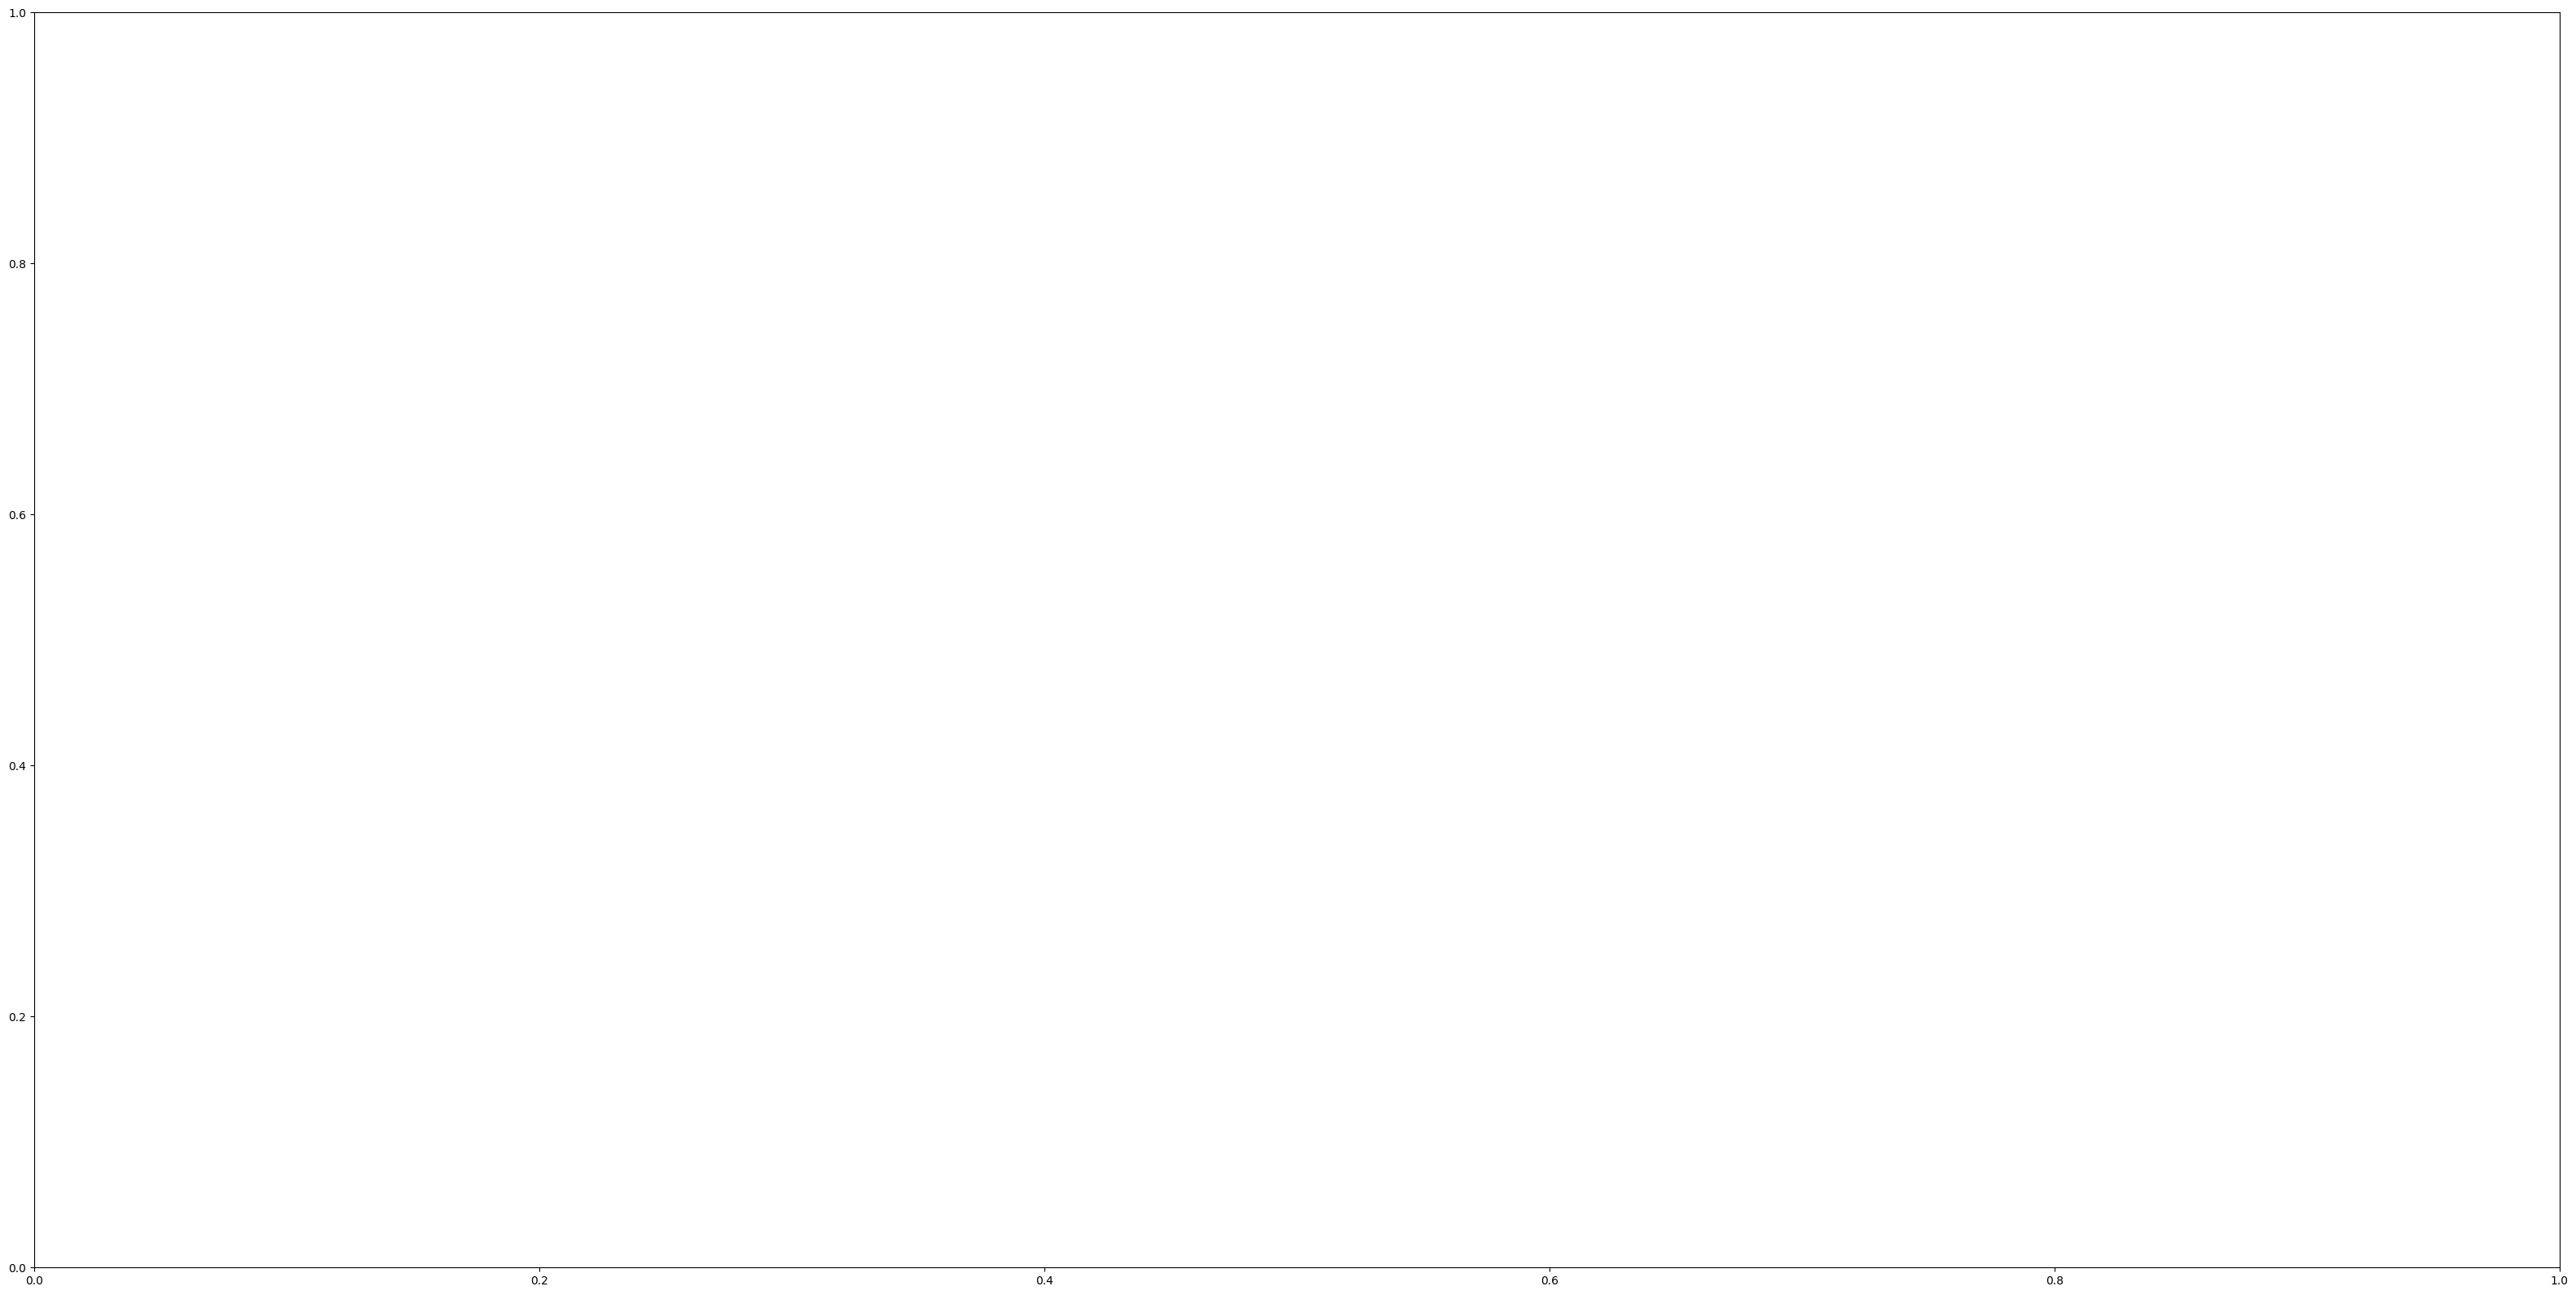

In [19]:
fig, ax = plt.subplots(figsize=(40, 20))
plt.style.use("fivethirtyeight")
# create a bar graph of the count of positive, negative, and neutral sentiment total
ax.bar(
    sent_us2["date"],
    sent_us2["negative"],
    label="Negative",
    color="orangered",
    width=85,
)
ax.bar(
    sent_us2["date"],
    sent_us2["neutral"],
    label="Neutral",
    color="gold",
    width=85,
    bottom=sent_us2["negative"],
)
ax.bar(
    sent_us2["date"],
    sent_us2["positive"],
    label="Positive",
    color="darkolivegreen",
    width=85,
    bottom=sent_us2["neutral"] + sent_us2["negative"],
)

<BarContainer object of 34 artists>

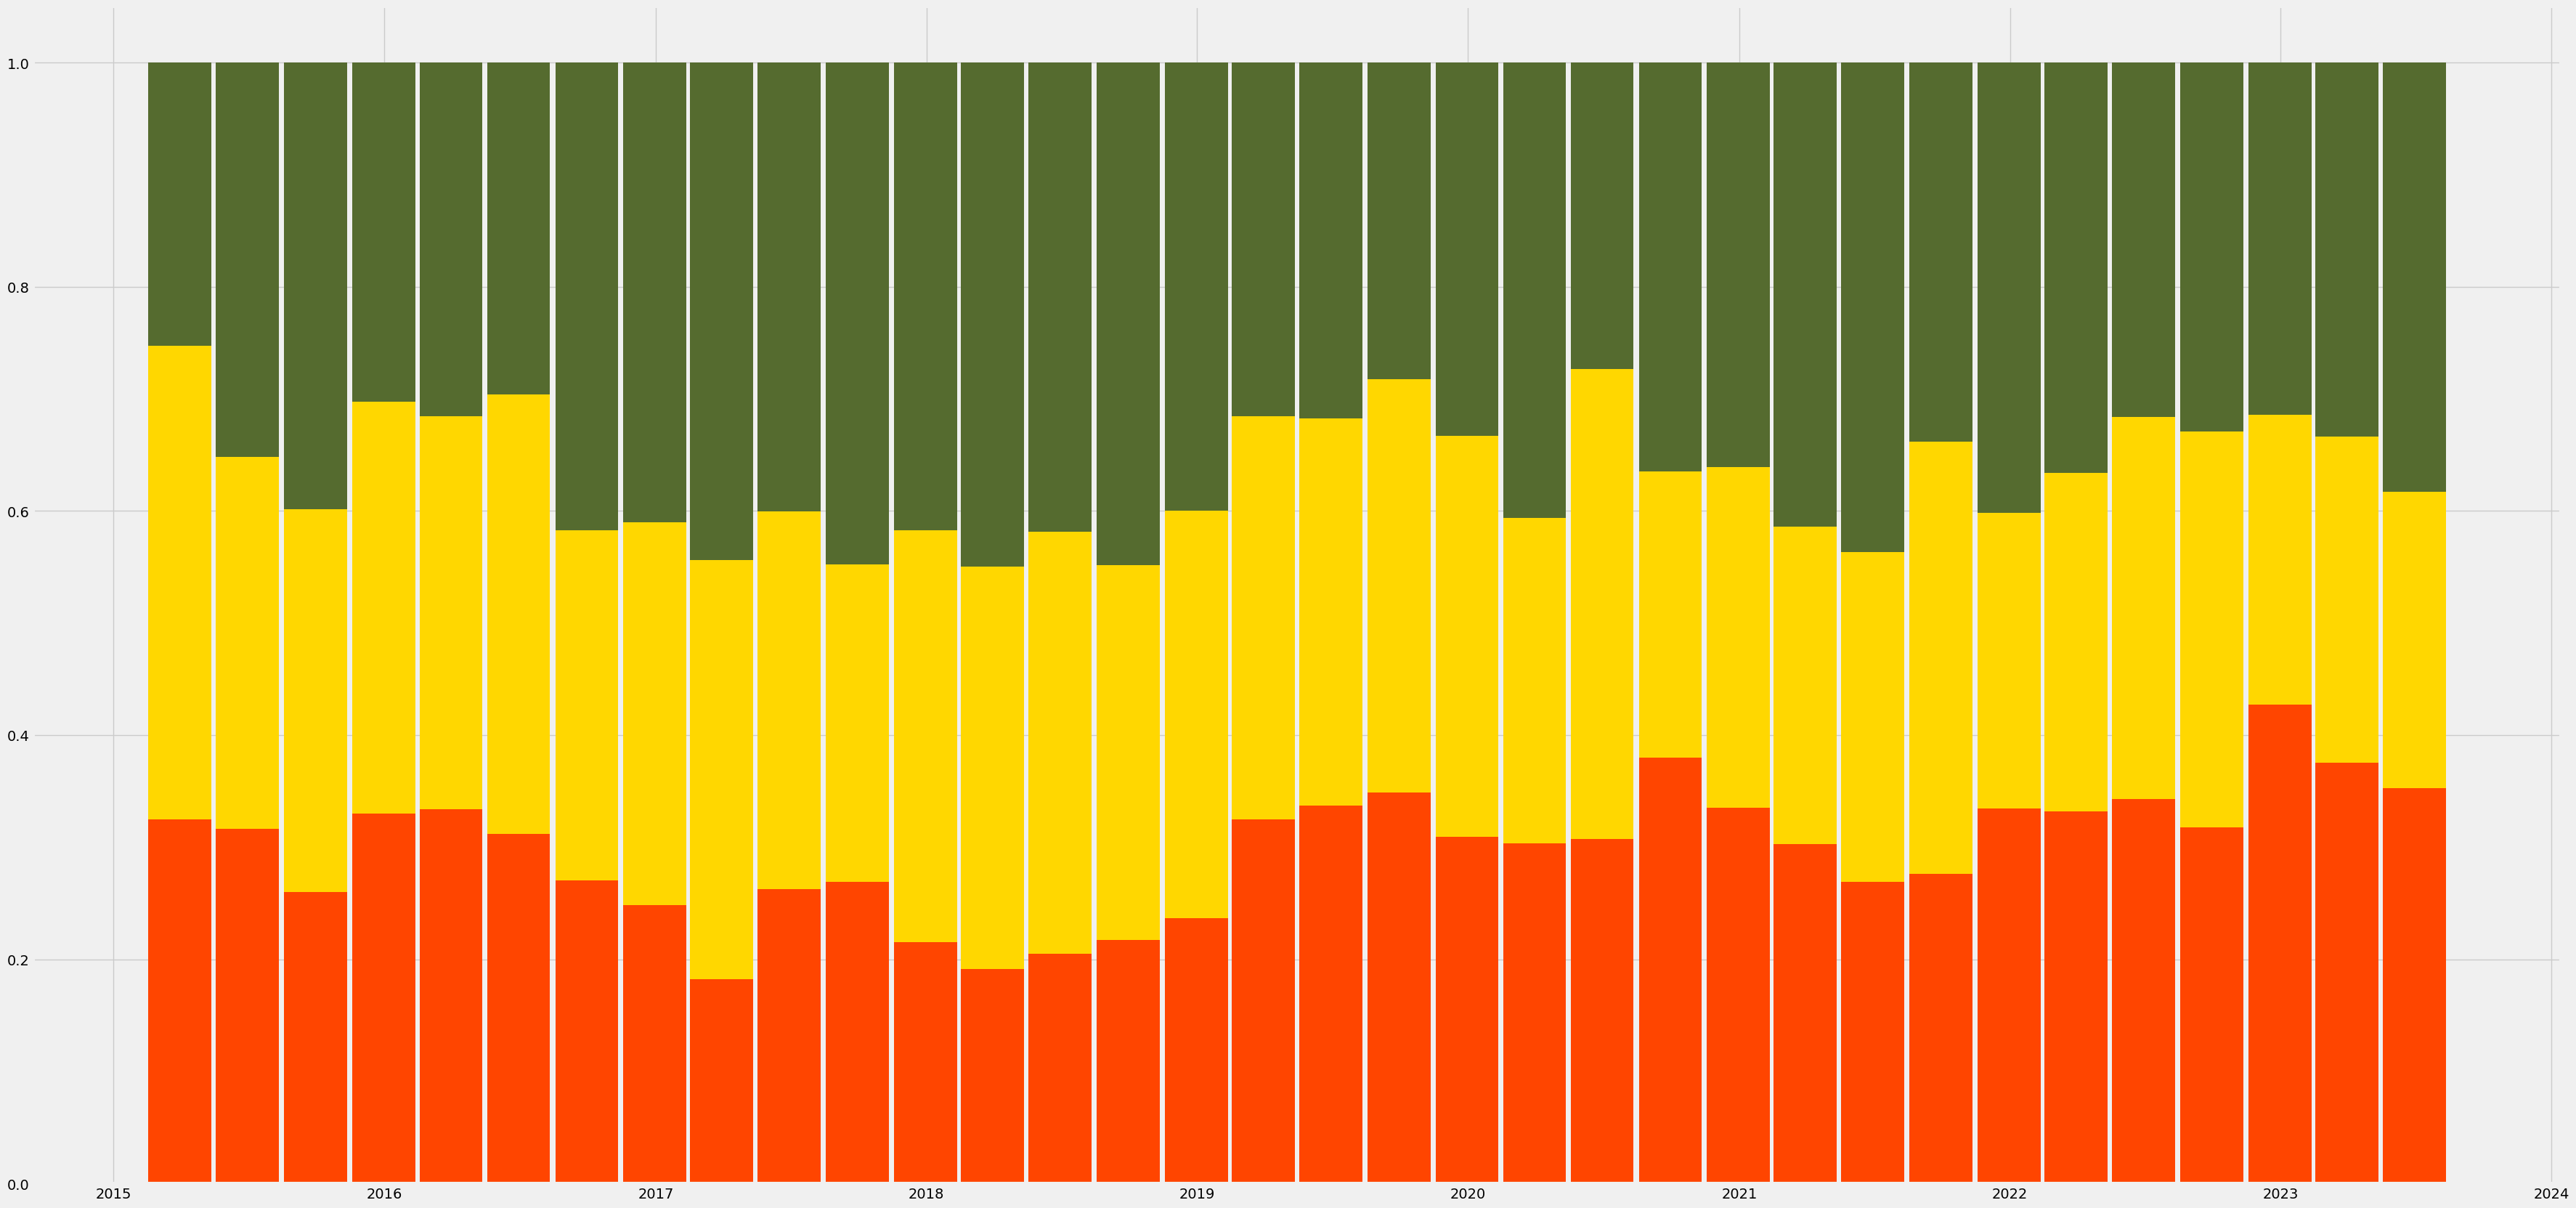

In [ ]:
fig, ax = plt.subplots(figsize=(40, 20))
plt.style.use("fivethirtyeight")
# create a bar graph of the count of positive, negative, and neutral sentiment total
ax.bar(
    sent_eu2["date"],
    sent_eu2["negative"],
    label="Negative",
    color="orangered",
    width=85,
)
ax.bar(
    sent_eu2["date"],
    sent_eu2["neutral"],
    label="Neutral",
    color="Gold",
    width=85,
    bottom=sent_eu2["negative"],
)
ax.bar(
    sent_eu2["date"],
    sent_eu2["positive"],
    label="Positive",
    color="darkolivegreen",
    width=85,
    bottom=sent_eu2["neutral"] + sent_eu2["negative"],
)